In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("./DATA/mouse_viral_study.csv")

In [3]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


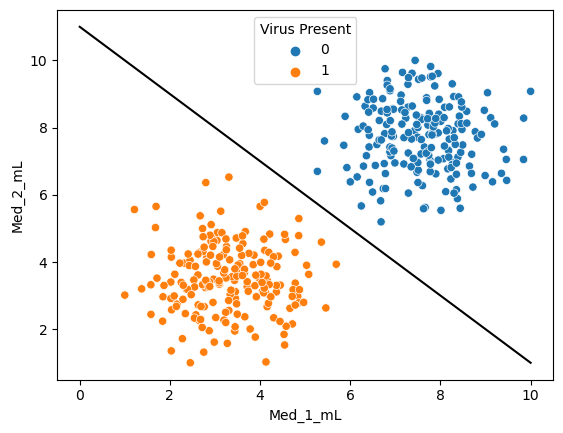

In [5]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',data=df)

# Creating a hyperplane for 2D-line.
x= np.linspace(0,10,100)
m=-1.1
b=11
y=m*x + b

plt.plot(x,y,'black')

In [6]:
from sklearn.svm import SVC

In [7]:
X = df.drop('Virus Present', axis=1)

In [8]:
y = df['Virus Present']

In [9]:
model = SVC(kernel='linear',C=1000)

In [10]:
model.fit(X,y)

SVC(C=1000, kernel='linear')

In [11]:
from svm_margin_plot import plot_svm_boundary

C:\Users\Muhammad Nasir\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


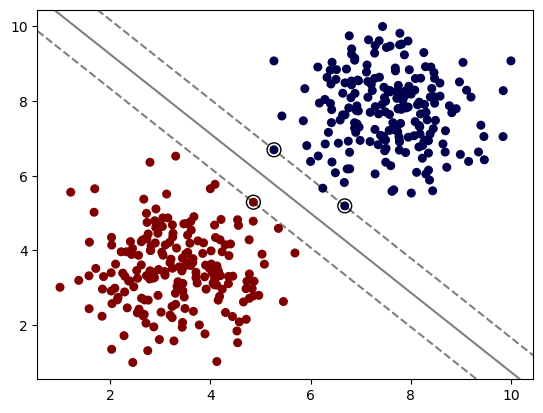

In [12]:
plot_svm_boundary(model,X,y)

In [13]:
model = SVC(kernel='linear', C=0.05)
model.fit(X,y)

SVC(C=0.05, kernel='linear')

C:\Users\Muhammad Nasir\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


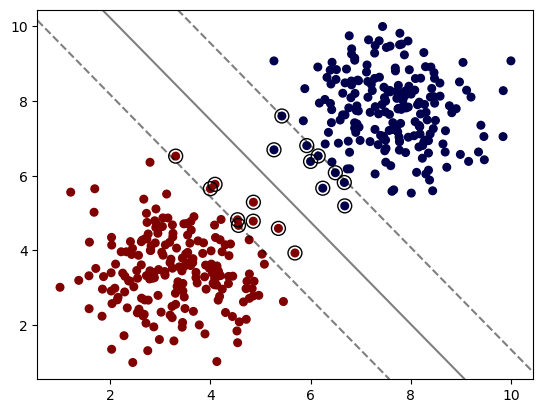

In [14]:
plot_svm_boundary(model,X,y)

C:\Users\Muhammad Nasir\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


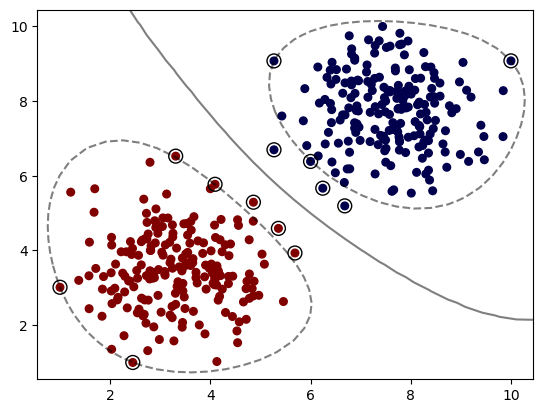

In [15]:
model = SVC(kernel='rbf',C=1)
model.fit(X,y)
plot_svm_boundary(model,X,y)

C:\Users\Muhammad Nasir\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


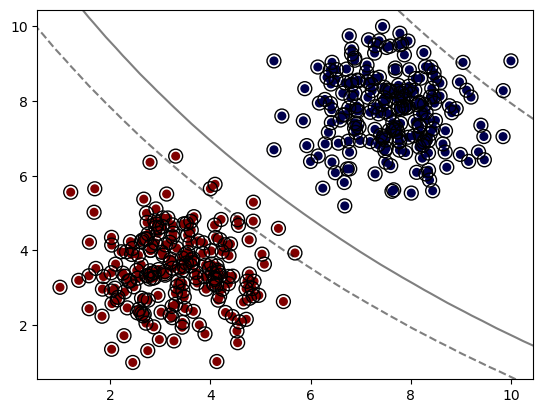

In [16]:
# The sigmoid kernel
model = SVC(kernel='sigmoid')
model.fit(X,y)
plot_svm_boundary(model,X,y)

C:\Users\Muhammad Nasir\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


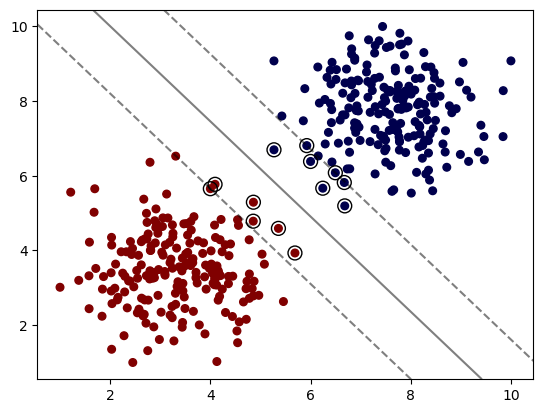

In [17]:
# The polinomial kernel
model = SVC(kernel='poly', C=1, degree=1)
model.fit(X,y)
plot_svm_boundary(model,X,y)

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
svm = SVC()
param_grid = {'C':[0.01,0.1,1], 'kernel':['linear','rbf']}

In [20]:
grid = GridSearchCV(svm,param_grid)

In [23]:
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [24]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

In [26]:
df = pd.read_csv("./DATA/cement_slump.csv")

In [27]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


<Axes: >

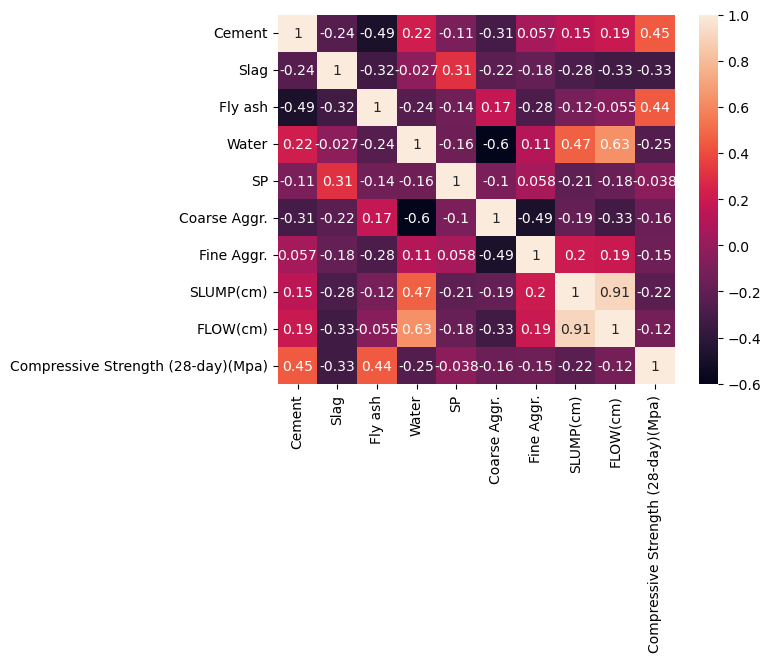

In [28]:
sns.heatmap(df.corr(),annot=True)

In [29]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [30]:
X = df.drop('Compressive Strength (28-day)(Mpa)',axis=1)

In [31]:
y = df['Compressive Strength (28-day)(Mpa)']

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [34]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()

In [37]:
scaled_X_train = scaler.fit_transform(X_train)

In [38]:
scaled_X_test = scaler.transform(X_test)

In [40]:
from sklearn.svm import SVR,LinearSVR

In [41]:
base_model = SVR()

In [43]:
base_model.fit(scaled_X_train,y_train)

SVR()

In [44]:
base_preds = base_model.predict(scaled_X_test)

In [45]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [46]:
mean_absolute_error(y_test,base_preds)

5.236902091259179

In [47]:
np.sqrt(mean_squared_error(y_test,base_preds))

6.695914838327133

In [48]:
y_test.mean()

36.26870967741935

In [49]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1], "kernel":['linear','rbf','poly'],
             'gamma':['scale','auto'], 'degree':[2,3,4], 'epsilon':[0,0.01,0.1,0.5,1,2]}

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
svr = SVR()

In [52]:
grid = GridSearchCV(svr,param_grid)

In [53]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [55]:
grid.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [56]:
grid_preds = grid.predict(scaled_X_test)

In [57]:
mean_absolute_error(y_test,grid_preds)

2.512801221076198

In [58]:
np.sqrt(mean_squared_error(y_test,grid_preds))

3.1782103051198347